# 9. Hafta Lab-6: One-Class SVM
## BGM 565: Siber Güvenlik için Makine Öğrenme Yöntemleri
## İstanbul Şehir Üni. - Bilgi Güvenliği Müh.
### Dr. Ferhat Özgür Çatak
Bu lab çalışması kapsamında *one-class svm* ile anomali tespit yöntemi yapılacaktır.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

### Örnek veri kümesi oluştur.

In [2]:
train_size = 100000
test_size = 1000
X = 0.3 * np.random.randn(train_size, 2)
X_train = np.r_[X + 2, X - 2]
X = 0.3 * np.random.randn(test_size, 2)
X_test = np.r_[X + 2, X - 2]

### Veri kümesine gürültü (noise) ekleyelim

In [3]:
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

### Anomali modelini oluşturalım

In [4]:
clf = svm.OneClassSVM(nu=0.001, kernel="rbf", gamma=0.1)
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.001, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

### Anomali tespiti

In [5]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

### Modelin hatalarını hesapla

In [6]:
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

### Veri görselleştirmesi

In [7]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Text(0.5, 0, 'error train: 200/100000 ; errors novel regular: 1/1000 ; errors novel abnormal: 4/40')

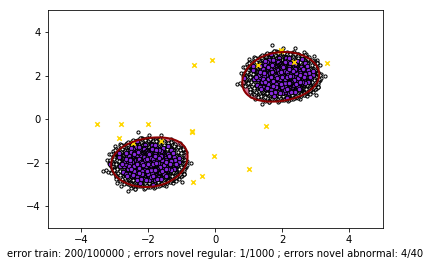

In [8]:
#plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 10
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=20,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=20, edgecolors='k', marker='x')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel(
    "error train: %d/%d ; errors novel regular: %d/%d ; "
    "errors novel abnormal: %d/40"
    % (n_error_train,train_size, n_error_test, test_size, n_error_outliers))